# Olympics & Economics Data

Team BAM: Beijing Wu, Austin Sanders, Melissa McGee

This analysis explores how a country's performance at the Olympics may correlate with various economic indicators of those countries. There are three main parts to this analysis:
1. High-level look at our primary Olympics dataset
2. Gold Medal trends
3. Macro-scale exploration of economic data correlation with Olympic performance
- Population
- Birth rate
- GDP per capita
- Economic freedom
- Gender equality (wage gap)
4. Zoomed-in look at individual event domination

# 1. High-level Exploration of Primary Olympics Dataset

Dataset source: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns

In [2]:
# Read in data
df = pd.read_csv("athlete_events.csv")

In [3]:
# How many rows & columns does our data have?
df.shape

(271116, 15)

In [4]:
# What does our data look like?
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# Lowercase all column names:
df.columns = df.columns.str.lower()

In [6]:
# How many null values do we have?
df.isnull().sum()

id             0
name           0
sex            0
age         9474
height     60171
weight     62875
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     231333
dtype: int64

In [7]:
# Let's change all nulls of "medal" to "no medal"
df["medal"].fillna("no medal", inplace = True)

In [8]:
# Read in the country information from the Olympic committees (National Olympic Committee = NOC)
region = pd.read_csv("noc_regions.csv")

In [9]:
# What does our data look like?
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [10]:
# Drop the notes column & rename other columns:
region.drop(["notes"], axis = 1, inplace = True)
region.columns = ["noc", "country"]

In [11]:
# Join the olympics data with our region data into a new dataframe:
olympics = df.merge(region, on = "noc", how = "left")

In [12]:
# What does our data look like?
olympics.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,country
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,no medal,China
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,no medal,China
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,no medal,Denmark
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,no medal,Netherlands


In [13]:
# Remove duplicate rows
olympics.loc[olympics["country"].isnull(), ["team", "noc"]].drop_duplicates()

,team,noc
578,Singapore,SGP
6267,Refugee Olympic Athletes,ROT
44376,June Climene,SGP
61080,Unknown,UNK
64674,Tuvalu,TUV
80986,Rika II,SGP
108582,Singapore-2,SGP
235895,Singapore-1,SGP


In [14]:
# If the country information is null, fill in with the olympics team name:
olympics.country.fillna(olympics.team, inplace = True)

In [15]:
# How many unique countries are in our data?
len(olympics.country.unique().tolist())

213

In [16]:
# Split the data into summer and winter olympics
summer_olympics = olympics[olympics.season == "Summer"]
winter_olympics = olympics[olympics.season == "Winter"]

In [17]:
# Understanding that each teammate receives a medal for a team sport:
olympics[olympics.event == "Basketball Men's Basketball"][olympics.noc == "USA"][olympics.games == '2000 Summer']\
[['name','age','country','games','event','medal']]

<ipython-input-17-a20e8e28e2b2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  olympics[olympics.event == "Basketball Men's Basketball"][olympics.noc == "USA"][olympics.games == '2000 Summer']\


,name,age,country,games,event,medal
609,Julius Shareef Abdur-Rahim,23.00,USA,2000 Summer,Basketball Men's Basketball,Gold
5031,Walter Ray Allen,25.00,USA,2000 Summer,Basketball Men's Basketball,Gold
12944,"Vincent Lamont ""Vin"" Baker",28.00,USA,2000 Summer,Basketball Men's Basketball,Gold
36316,"Vincent Lamar ""Vince"" Carter",23.00,USA,2000 Summer,Basketball Men's Basketball,Gold
76507,Kevin Maurice Garnett,24.00,USA,2000 Summer,Basketball Men's Basketball,Gold
90724,"Timothy Duane ""Tim"" Hardaway",34.00,USA,2000 Summer,Basketball Men's Basketball,Gold
99317,Allan Wade Houston,29.00,USA,2000 Summer,Basketball Men's Basketball,Gold
117708,Jason Frederick Kidd,27.00,USA,2000 Summer,Basketball Men's Basketball,Gold
154369,Antonio Keithflen McDyess,26.00,USA,2000 Summer,Basketball Men's Basketball,Gold
164563,Alonzo Harding Mourning,30.00,USA,2000 Summer,Basketball Men's Basketball,Gold


#### High-level information about data in dataset:

In [18]:
# first games in dataset
olympics[olympics.year == 1896][['games','city']].value_counts()

games        city  
1896 Summer  Athina    380
dtype: int64

In [19]:
# latest games in dataset
olympics[olympics.year == 2016][['games','city']].value_counts()

games        city          
2016 Summer  Rio de Janeiro    13688
dtype: int64

In [20]:
# Number of unique games represented in data set
print(len(sorted(set(olympics.games.unique()))))

51


In [21]:
# Number of Summer games
print(len(sorted(set(summer_olympics.games.unique()))))

29


In [22]:
# Number of Winter games
print(len(sorted(set(winter_olympics.games.unique()))))

22


### Have # of countries, # of atheletes, # of events changed over time?

#### Number of Countries

In [23]:
# Create new dataframe dictating the number of countries participating in each games
num_country = pd.DataFrame(olympics.groupby(["season", "year"])["country"].nunique()).reset_index()
num_country.head()

,season,year,country
0,Summer,1896,12
1,Summer,1900,31
2,Summer,1904,14
3,Summer,1906,20
4,Summer,1908,22


In [24]:
# Pivot this to create columns for summer games versus winter games
num_country_pivot = num_country.pivot(index = "year", columns = "season", values = "country").reset_index()
num_country_pivot.columns = ["year", "summer_country_count", "winter_country_count"]
num_country_pivot.set_index("year", inplace = True)
num_country_pivot.head()

,summer_country_count,winter_country_count
year,,
1896,12.00,NaN
1900,31.00,NaN
1904,14.00,NaN
1906,20.00,NaN
1908,22.00,NaN


#### Number of Athletes

In [25]:
# Repeat as above but for athletes
num_athlete = pd.DataFrame(olympics.groupby(["season", "year"])["name"].nunique()).reset_index()
num_athlete.head()

,season,year,name
0,Summer,1896,176
1,Summer,1900,1220
2,Summer,1904,650
3,Summer,1906,841
4,Summer,1908,2024


In [26]:
num_athlete_pivot = num_athlete.pivot(index = "year", columns = "season", values = "name").reset_index()
num_athlete_pivot.columns = ["year", "summer_athlete_count", "winter_athlete_count"]
num_athlete_pivot.set_index("year", inplace = True)
num_athlete_pivot.head()

,summer_athlete_count,winter_athlete_count
year,,
1896,176.00,NaN
1900,"1,220.00",NaN
1904,650.00,NaN
1906,841.00,NaN
1908,"2,024.00",NaN


#### Number of Events

In [27]:
# Repeat as above but for events
num_event = pd.DataFrame(olympics.groupby(["season", "year"])["event"].nunique()).reset_index()
num_event.head()

,season,year,event
0,Summer,1896,43
1,Summer,1900,90
2,Summer,1904,95
3,Summer,1906,74
4,Summer,1908,109


In [28]:
num_event_pivot = num_event.pivot(index = "year", columns = "season", values = "event").reset_index()
num_event_pivot.columns = ["year", "summer_event_count", "winter_event_count"]
num_event_pivot.set_index("year", inplace = True)
num_event_pivot.head()

,summer_event_count,winter_event_count
year,,
1896,43.00,NaN
1900,90.00,NaN
1904,95.00,NaN
1906,74.00,NaN
1908,109.00,NaN


#### Plot these three trends over time

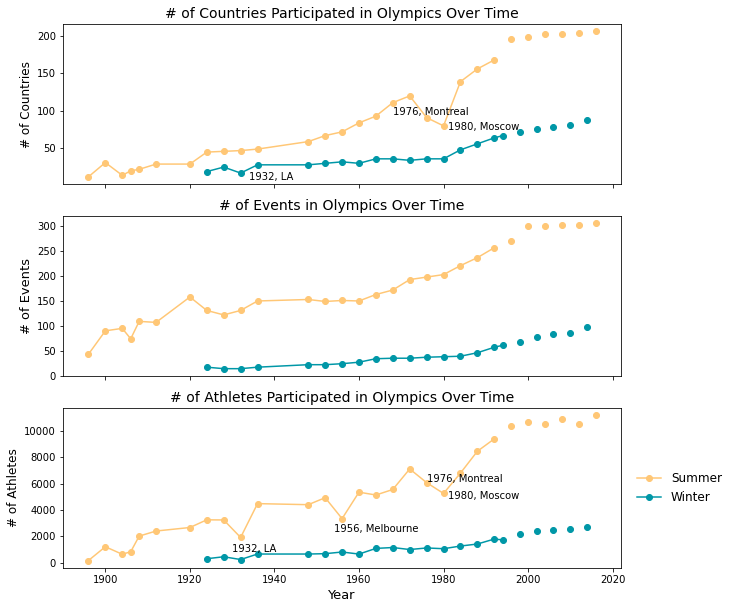

In [29]:
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (10, 10))
fig.subplots_adjust(hspace = 0.2)

ax[0].plot(num_country_pivot.summer_country_count, color = "#FFC776", marker = "o")
ax[0].plot(num_country_pivot.winter_country_count, color = "#0097A7", marker = "o")
ax[0].set_title("# of Countries Participated in Olympics Over Time", fontsize = 14)
ax[0].set_ylabel("# of Countries", fontsize = 12)
ax[0].text(1934, 8, "1932, LA")
ax[0].text(1968, 95, "1976, Montreal")
ax[0].text(1981, 75, "1980, Moscow")

ax[1].plot(num_event_pivot.summer_event_count, color = "#FFC776", marker = "o")
ax[1].plot(num_event_pivot.winter_event_count, color = "#0097A7", marker = "o")
ax[1].set_title("# of Events in Olympics Over Time", fontsize = 14)
ax[1].set_ylabel("# of Events", fontsize = 13)


ax[2].plot(num_athlete_pivot.summer_athlete_count, 
           color = "#FFC776", marker = "o", label = "Summer")
ax[2].plot(num_athlete_pivot.winter_athlete_count, 
           color = "#0097A7", marker = "o", label = "Winter")
ax[2].set_title("# of Athletes Participated in Olympics Over Time", fontsize = 14)
ax[2].set_ylabel("# of Athletes", fontsize = 12)
ax[2].set_xlabel("Year", fontsize = 13)
ax[2].text(1930, 800, "1932, LA")
ax[2].text(1954, 2300, "1956, Melbourne")
ax[2].text(1976, 6100, "1976, Montreal")
ax[2].text(1981, 4800, "1980, Moscow")
ax[2].legend(bbox_to_anchor = (1.01, 0.5), loc = "center left", fontsize = 12, frameon = False)
pass

## Top Countries in terms of TOTAL medal count (gold + silver + bronze)

In [30]:
# Create new column of medal count
olympics["medal_count"] = olympics["medal"]
olympics = olympics.replace({"medal_count": {"Gold":1, "Silver":1, "Bronze":1, "no medal":0}})

In [31]:
# Group by country to see medals won per country
num_medal = olympics[["country", "medal", "medal_count"]].groupby(["country"], as_index = False).sum().sort_values(by = "medal_count", ascending = False)
top20_medal_country = num_medal["country"].head(20).to_list()
top20_medal_country
num_medal_type = olympics[["country", "medal", "medal_count"]].groupby(["country", "medal"], as_index = False).sum().sort_values(by = "medal_count", ascending = False)
num_medal_type = num_medal_type[num_medal_type["country"].isin(top20_medal_country)]


In [32]:
# Pivot table to see medal information as columns
num_medal_type_wide = num_medal_type.pivot(index = "country", columns = "medal", values = "medal_count").reset_index()
# Drop no medal column
num_medal_type_wide.drop(columns = "no medal", inplace = True)
num_medal_type_wide = num_medal_type_wide.rename_axis(None, axis = 1)
num_medal_type_wide["total"] = num_medal_type_wide.sum(axis = 1)
num_medal_type_wide = num_medal_type_wide.sort_values(by = "total", ascending = False)

In [33]:
# Drop total column
num_medal_type_wide_2 = num_medal_type_wide.drop(columns = "total")
num_medal_type_wide_2 = num_medal_type_wide_2[["country", "Bronze", "Silver", "Gold"]]
num_medal_type_wide_2.head()

,country,Bronze,Silver,Gold
19,USA,1358,1641,2638
14,Russia,1178,1170,1599
7,Germany,1260,1195,1301
18,UK,651,739,678
6,France,666,610,501


In [34]:
total_medal = num_medal_type_wide["total"].to_list()

#### Plot total medals per top medal-earning country

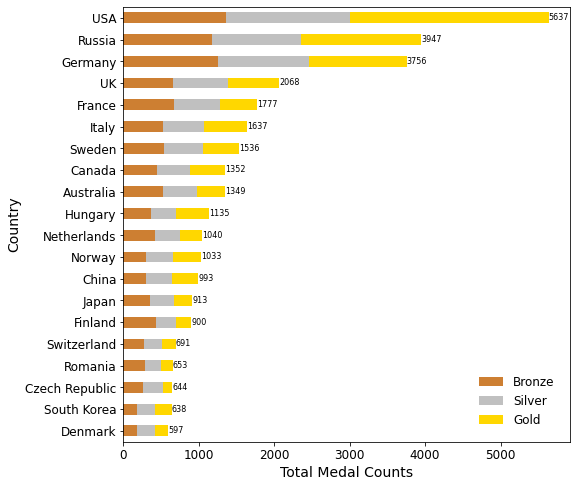

In [35]:
fig, ax = plt.subplots(figsize = (8, 8))
ax = num_medal_type_wide_2.plot.barh(x = "country", stacked = True, color = ("#cd7f32", "#c0c0c0", "#ffd700"), ax = ax)
for i, v in enumerate(num_medal_type_wide.total):
    ax.text(v, i + 0.1, str(v), fontsize = 8)
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor = (0.99, 0.01), 
           loc = "lower right",
           fontsize = 12,
           frameon = False)
plt.xlabel("Total Medal Counts", fontsize = 14)
plt.ylabel("Country", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
pass

### Total # of Medal Count by Year

In [36]:
country_list = num_medal_type_wide_2["country"].to_list()

total_medal = olympics[["season", "year", "country", "medal_count"]].\
groupby(["season", "year", "country"], as_index = False).sum()

total_medal = total_medal[total_medal["country"].isin(country_list)]

In [37]:
total_medal_wide_summer = total_medal[total_medal.season == "Summer"].\
pivot(index = "year", columns = "country", values = "medal_count").reset_index()

stack_total_medal_wide_summer = total_medal_wide_summer.fillna(0)
stack_total_medal_wide_summer.set_index("year", inplace = True)
stack_total_medal_wide_summer = stack_total_medal_wide_summer.apply(lambda x : x*100/sum(x), axis = 1)

In [38]:
total_medal_wide_winter = total_medal[total_medal.season == "Winter"].pivot(index = "year", columns = "country", values = "medal_count").reset_index()
stack_total_medal_wide_winter = total_medal_wide_winter.fillna(0)
stack_total_medal_wide_winter.set_index("year", inplace = True)
stack_total_medal_wide_winter = stack_total_medal_wide_winter.apply(lambda x : x*100/sum(x), axis = 1)

In [39]:
color_list = ['#800000', '#9A6324', '#808000', '#469990', '#000075', 
              '#e6194B', '#f58231', '#ffe119', '#bfef45', '#3cb44b', 
              '#42d4f4', '#4363d8', '#911eb4', '#f032e6', '#a9a9a9', 
              '#fabed4', '#ffd8b1', '#fffac8', '#aaffc3', '#dcbeff']

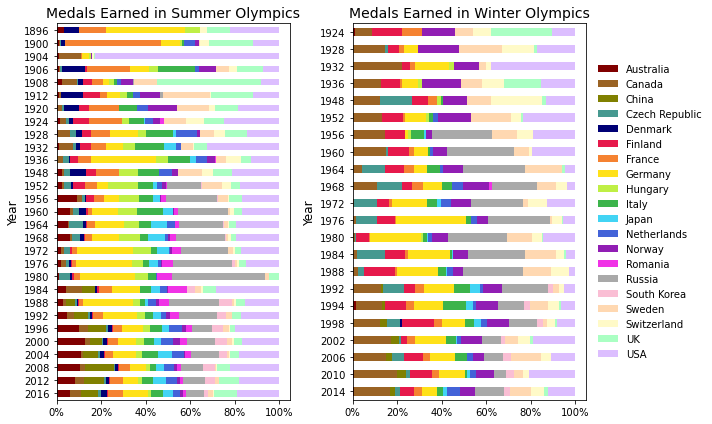

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
stack_total_medal_wide_summer.plot(ax = ax[0], kind = "barh", stacked = True, color = color_list)
ax[0].invert_yaxis()
ax[0].get_legend().remove()
ax[0].set_title("Medals Earned in Summer Olympics", fontsize = 14)
ax[0].set_ylabel("Year", fontsize = 12)
ax[0].xaxis.set_major_formatter(mtick.PercentFormatter(symbol = "%"))

stack_total_medal_wide_winter.plot(ax = ax[1], kind = "barh", stacked = True, color = color_list)
ax[1].legend(bbox_to_anchor = (1.01, 0.5), loc = "center left", fontsize = 10, frameon = False)
ax[1].invert_yaxis()
ax[1].set_title("Medals Earned in Winter Olympics", fontsize = 14)
ax[1].set_ylabel("Year", fontsize = 12)
ax[1].xaxis.set_major_formatter(mtick.PercentFormatter(symbol = "%"))

fig.tight_layout()

pass

# 2. Gold Medal Trends at the Summer Olympics

In [41]:
# Top 10 countries with the most gold medals over ALL the summer olympics
gold_all_years = summer_olympics.groupby(["country", "medal"], as_index = False).size()
gold_all_years = gold_all_years[gold_all_years.medal == "Gold"].sort_values(by = ["size"], ascending = False).head(10)
gold_all_years.columns = ["country", "medal", "counts"]
gold_all_years

,country,medal,counts
497,USA,Gold,2472
389,Russia,Gold,1220
169,Germany,Gold,1075
493,UK,Gold,636
228,Italy,Gold,518
158,France,Gold,465
195,Hungary,Gold,432
21,Australia,Gold,362
448,Sweden,Gold,354
91,China,Gold,335


In [42]:
# Turning into list form
gold_all_years_country = gold_all_years.country.to_list()
gold_all_years_country

['USA',
 'Russia',
 'Germany',
 'UK',
 'Italy',
 'France',
 'Hungary',
 'Australia',
 'Sweden',
 'China']

In [43]:
# Looking at the data per year
gold_by_year = summer_olympics.groupby(["country", "year", "medal"], as_index = False).size()
gold_by_year = gold_by_year[gold_by_year.medal == "Gold"]
gold_by_year = gold_by_year[gold_by_year["country"].isin(gold_all_years_country)]
gold_by_year.columns = ["country", "year", "medal", "counts"]
gold_by_year.head()

,country,year,medal,counts
174,Australia,1896,Gold,2
177,Australia,1900,Gold,3
184,Australia,1908,Gold,15
188,Australia,1912,Gold,5
195,Australia,1924,Gold,3


In [44]:
# Pivoting to transform information into columns
gold_by_year_wide = gold_by_year.pivot(index = "year", columns = "country", values = "counts").reset_index()
gold_by_year_wide.head()

country,year,Australia,China,France,Germany,Hungary,Italy,Russia,Sweden,UK,USA
0,1896,2.00,NaN,5.00,25.00,2.00,NaN,NaN,NaN,3.00,11.00
1,1900,3.00,NaN,52.00,14.00,1.00,3.00,NaN,3.00,59.00,30.00
2,1904,NaN,NaN,NaN,4.00,2.00,NaN,NaN,NaN,1.00,128.00
3,1906,NaN,NaN,20.00,14.00,5.00,21.00,NaN,2.00,9.00,12.00
4,1908,15.00,NaN,12.00,4.00,7.00,2.00,1.00,48.00,147.00,34.00


#### Plotting Gold Medal Trends at the Summer Olympics over time

In [45]:
# Creating list of colors
gold_country_color = ["#68217a", "#e81123", "#ff8c00", "#ec008c", "#fff100", 
                      "#bad80a", "#009e49", "#00b294", "#00bcf2", "#00188f"]

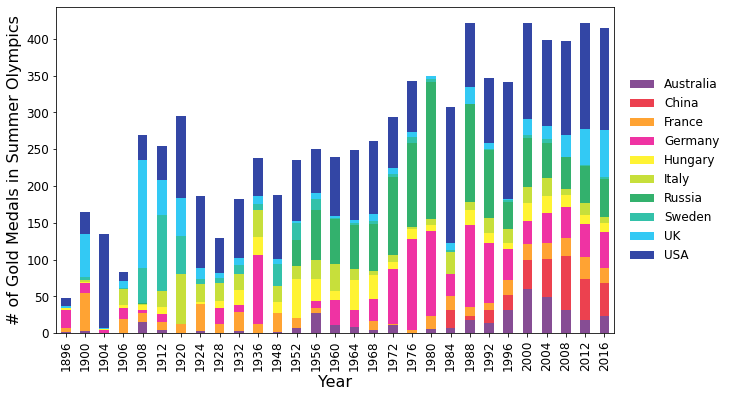

In [46]:
fig, ax = plt.subplots(figsize = (10, 6))
ax = gold_by_year_wide.plot.bar(x = "year", stacked = True, color = gold_country_color, alpha = 0.8, ax = ax)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("# of Gold Medals in Summer Olympics", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(bbox_to_anchor = (1.01, 0.5), 
           loc = "center left",
           fontsize = 12,
           frameon = False)
pass

# 3. Macro-scale Economic Factors

In [47]:
total_medal_2016 = olympics[["season", "year", "country", "medal_count"]].groupby(["season", "year", "country"], as_index = False).sum()
total_medal_2016 = total_medal_2016[total_medal_2016.year == 2016]

In [48]:
total_medal_wide_summer_sub = total_medal_wide_summer[["year", "Germany", "Russia", "USA","Japan"]]
total_medal_wide_summer_sub.columns = ["year", "Germany_summer", "Russia_summer", "USA_summer","Japan_summer"]
total_medal_wide_summer_sub = total_medal_wide_summer_sub.astype({"year":int})

In [49]:
total_medal_wide_winter_sub = total_medal_wide_winter[["year", "Germany", "Russia", "USA","Japan"]]
total_medal_wide_winter_sub.columns = ["year", "Germany_winter", "Russia_winter", "USA_winter","Japan_winter"]
total_medal_wide_winter_sub = total_medal_wide_winter_sub.astype({"year":int})

In [50]:
medal = pd.merge(total_medal_wide_summer_sub, total_medal_wide_winter_sub, on = "year", how = "outer")

## Population

### Data

In [51]:
population_all = pd.read_csv("population.csv")
population_all = population_all.drop(["Country Code", "Indicator Name", "Indicator Code", "Unnamed: 65"], axis = 1)
population_all.rename(columns = {"Country Name":"country"}, inplace = True)
population_all.country.replace({"United Kingdom":"UK", "United States":"USA", "Russian Federation":"Russia", "Korea, Rep.":"South Korea"}, inplace = True)

In [52]:
population = population_all[population_all["country"].isin(country_list)]
population = population.set_index("country").T
population = population.reindex(sorted(population.columns), axis = 1)
population.head()

country,Australia,Canada,China,Czech Republic,Denmark,Finland,France,Germany,Hungary,Italy,Japan,Netherlands,Norway,Romania,Russia,South Korea,Sweden,Switzerland,UK,USA
1960,"10,276,477.00","17,909,009.00","667,070,000.00","9,602,006.00","4,579,603.00","4,429,634.00","46,621,688.00","72,814,900.00","9,983,967.00","50,199,700.00","93,216,000.00","11,486,631.00","3,581,239.00","18,406,905.00","119,897,000.00","25,012,374.00","7,484,656.00","5,327,827.00","52,400,000.00","180,671,000.00"
1961,"10,483,000.00","18,271,000.00","660,330,000.00","9,586,651.00","4,611,687.00","4,461,005.00","47,240,526.00","73,377,632.00","10,029,321.00","50,536,350.00","94,055,000.00","11,638,712.00","3,609,800.00","18,555,250.00","121,236,000.00","25,765,673.00","7,519,998.00","5,434,294.00","52,800,000.00","183,691,000.00"
1962,"10,742,000.00","18,614,000.00","665,770,000.00","9,624,660.00","4,647,727.00","4,491,443.00","47,904,879.00","74,025,784.00","10,061,734.00","50,879,450.00","94,933,000.00","11,805,689.00","3,638,918.00","18,676,550.00","122,591,000.00","26,513,030.00","7,561,588.00","5,573,815.00","53,250,000.00","186,538,000.00"
1963,"10,950,000.00","18,964,000.00","682,335,000.00","9,670,685.00","4,684,483.00","4,523,309.00","48,582,624.00","74,714,353.00","10,087,947.00","51,252,000.00","95,900,000.00","11,965,966.00","3,666,537.00","18,797,850.00","123,960,000.00","27,261,747.00","7,604,328.00","5,694,247.00","53,650,000.00","189,242,000.00"
1964,"11,167,000.00","19,325,000.00","698,355,000.00","9,727,804.00","4,722,072.00","4,548,543.00","49,230,585.00","75,318,337.00","10,119,835.00","51,675,350.00","96,903,000.00","12,127,120.00","3,694,339.00","18,919,126.00","125,345,000.00","27,984,155.00","7,661,354.00","5,789,228.00","54,000,000.00","191,889,000.00"


### Scatter Plot - 2016

In [53]:
population_2016 = population_all[["country", "2016"]]
medal_pop_2016 = pd.merge(total_medal_2016, population_2016, on = "country", how = "left")
medal_pop_2016.columns = ["season", "year", "country", "medal_count", "population"]
medal_pop_2016.sort_values(by = "medal_count", ascending = False).head()

,season,year,country,medal_count,population
192,Summer,2016,USA,264,"323,071,755.00"
66,Summer,2016,Germany,159,"82,348,669.00"
191,Summer,2016,UK,145,"65,611,593.00"
150,Summer,2016,Russia,115,"144,342,397.00"
39,Summer,2016,China,113,"1,378,665,000.00"


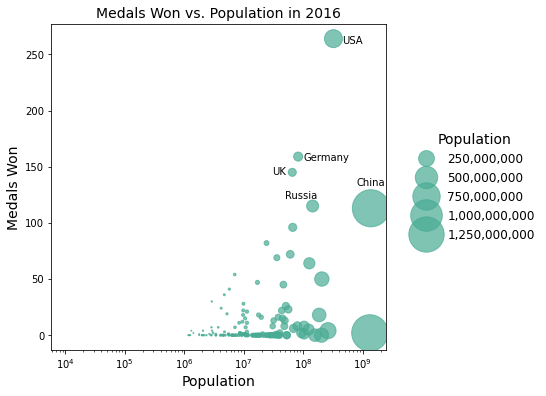

In [54]:
sizes = medal_pop_2016.population // 1000000
sizes = sizes.to_list()
sizes = [0.0 if pd.isna(x) else x for x in sizes]

fig, ax = plt.subplots(1, 1, figsize = (6, 6))
sc = ax.scatter(medal_pop_2016.population, 
                medal_pop_2016.medal_count,
                color = "#49AB94", 
                alpha = 0.7,
                s = sizes)
ax.set_title("Medals Won vs. Population in 2016", fontsize = 14)
ax.set_ylabel("Medals Won", fontsize = 14)
ax.set_xlabel("Population", fontsize = 14)
ax.set_xscale("log")
ax.text(460000000, 260, "USA")
ax.text(100000000, 155, "Germany")
ax.text(30000000, 143, "UK")
ax.text(50000000, 122, "Russia")
ax.text(800000000, 133, "China")

kw = dict(prop = "sizes", num = 6, color = "#49AB94", fmt = "{x:,.0f}",
          func = lambda s: s*1000000)
legend = ax.legend(*sc.legend_elements(**kw), 
                   bbox_to_anchor = (1.05, 0.5), loc = "center left", 
                   fontsize = 12, frameon = False)
legend.set_title("Population", prop = {"size":14})
pass

### Time Series for Select Countries

In [55]:
population_sub = population[["Germany", "Russia", "USA", "Japan"]]
population_sub.reset_index(inplace = True)
population_sub.columns = ["year", "Germany_pop", "Russia_pop", "USA_pop", "Japan_pop"]
population_sub = population_sub.astype({"year":int})

In [56]:
medal = pd.merge(total_medal_wide_summer_sub, total_medal_wide_winter_sub, on = "year", how = "outer")
medal_pop = pd.merge(medal, population_sub, on = "year", how = "outer")

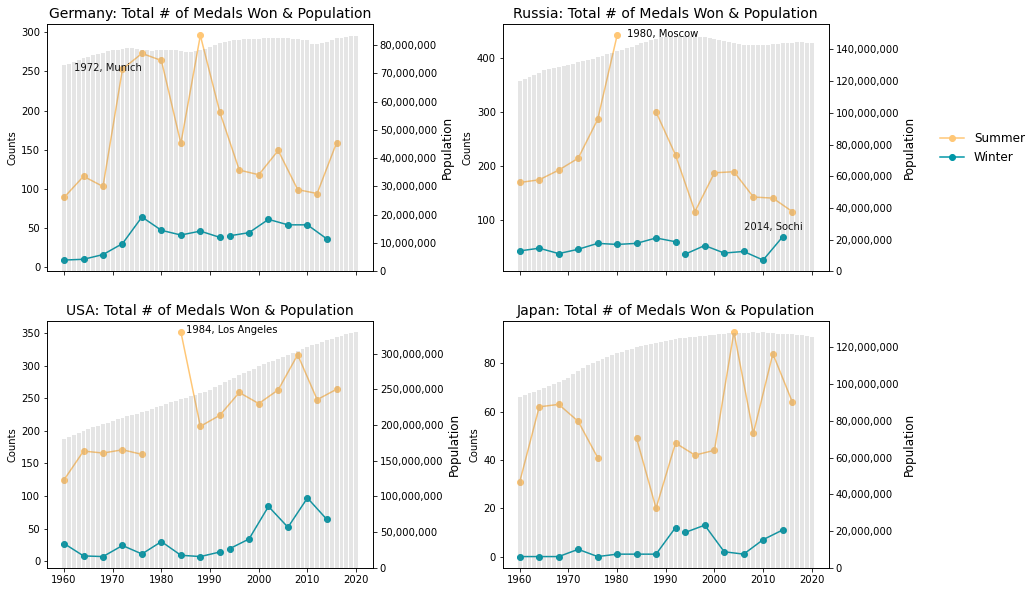

In [57]:
fig, ax1 = plt.subplots(2, 2, sharex = True, figsize = (14, 10))
fig.subplots_adjust(hspace = 0.2, wspace = 0.4)

ax1[0,0].plot(medal_pop.year.iloc[14:], medal_pop.Germany_summer.iloc[14:], color = "#FFC776", marker = "o")
ax1[0,0].plot(medal_pop.year.iloc[14:], medal_pop.Germany_winter.iloc[14:], color = "#0097A7", marker = "o")
ax1[0,0].set_title("Germany: Total # of Medals Won & Population", fontsize = 14)
ax1[0,0].set_ylabel("Counts", fontsize = 10)
ax2 = ax1[0,0].twinx()
ax2.bar(medal_pop.year, medal_pop.Germany_pop, width = 0.8, alpha = 0.2, color = "gray")
ax2.set_ylabel("Population", fontsize = 12)
ax2.ticklabel_format(useOffset = False, style = "plain", axis = "y")
ax2.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p : format(int(x), ",")))
ax1[0,0].text(1962, 250, "1972, Munich")

ax1[0,1].plot(medal_pop.year.iloc[14:], medal_pop.Russia_summer.iloc[14:], 
              color = "#FFC776", marker = "o", label = "Summer")
ax1[0,1].plot(medal_pop.year.iloc[14:], medal_pop.Russia_winter.iloc[14:], 
              color = "#0097A7", marker = "o", label = "Winter")
ax1[0,1].set_title("Russia: Total # of Medals Won & Population", fontsize = 14)
ax1[0,1].set_ylabel("Counts", fontsize = 10)
ax1[0,1].legend(bbox_to_anchor = (1.31, 0.5), loc = "center left", fontsize = 12, frameon = False)
ax3 = ax1[0,1].twinx()
ax3.bar(medal_pop.year, medal_pop.Russia_pop, width = 0.8, alpha = 0.2, color = "gray")
ax3.set_ylabel("Population", fontsize = 12)
ax3.ticklabel_format(useOffset = False, style = "plain", axis = "y")
ax3.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p : format(int(x), ",")))
ax1[0,1].text(1982, 440, "1980, Moscow")
ax1[0,1].text(2006, 80, "2014, Sochi")

ax1[1,0].plot(medal_pop.year.iloc[14:], medal_pop.USA_summer.iloc[14:], color = "#FFC776", marker = "o")
ax1[1,0].plot(medal_pop.year.iloc[14:], medal_pop.USA_winter.iloc[14:], color = "#0097A7", marker = "o")
ax1[1,0].set_title("USA: Total # of Medals Won & Population", fontsize = 14)
ax1[1,0].set_ylabel("Counts", fontsize = 10)
ax4 = ax1[1,0].twinx()
ax4.bar(medal_pop.year, medal_pop.USA_pop, width = 0.8, alpha = 0.2, color = "gray")
ax4.set_ylabel("Population", fontsize = 12)
ax4.ticklabel_format(useOffset = False, style = "plain", axis = "y")
ax4.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p : format(int(x), ",")))
ax1[1,0].text(1985, 350, "1984, Los Angeles")

ax1[1,1].plot(medal_pop.year.iloc[14:], medal_pop.Japan_summer.iloc[14:], color = "#FFC776", marker = "o")
ax1[1,1].plot(medal_pop.year.iloc[14:], medal_pop.Japan_winter.iloc[14:], color = "#0097A7", marker = "o")
ax1[1,1].set_title("Japan: Total # of Medals Won & Population", fontsize = 14)
ax1[1,1].set_ylabel("Counts", fontsize = 10)
ax4 = ax1[1,1].twinx()
ax4.bar(medal_pop.year, medal_pop.Japan_pop, width = 0.8, alpha = 0.2, color = "gray")
ax4.set_ylabel("Population", fontsize = 12)
ax4.ticklabel_format(useOffset = False, style = "plain", axis = "y")
ax4.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p : format(int(x), ",")))

pass

## Birth Rate

### Data

In [58]:
birth_rate = pd.read_csv("birth_rate.csv", skiprows = 4)
birth_rate = birth_rate.drop(["Country Code", "Indicator Name", "Indicator Code", "Unnamed: 65"], axis = 1)
birth_rate.rename(columns = {"Country Name":"country"}, inplace = True)
birth_rate.country.replace({"United Kingdom":"UK", "United States":"USA", "Russian Federation":"Russia", "Korea, Rep.":"South Korea"}, inplace = True)
birth_rate = birth_rate[birth_rate["country"].isin(country_list)]
birth_rate = birth_rate.set_index("country").T
birth_rate = birth_rate.reindex(sorted(birth_rate.columns), axis = 1)
birth_rate.head()

country,Australia,Canada,China,Czech Republic,Denmark,Finland,France,Germany,Hungary,Italy,Japan,Netherlands,Norway,Romania,Russia,South Korea,Sweden,Switzerland,UK,USA
1960,22.40,26.70,20.86,13.40,16.60,18.50,18.70,17.30,14.70,18.10,17.30,20.80,17.30,19.10,23.79,42.28,13.70,17.70,17.50,23.70
1961,22.90,26.00,18.02,13.70,16.60,18.40,18.70,17.90,14.00,18.40,17.00,21.30,17.30,17.50,22.73,41.01,13.90,18.30,17.90,23.30
1962,22.10,25.20,37.01,13.90,16.70,18.10,18.60,17.80,12.90,18.40,17.10,20.90,17.10,16.20,21.54,39.58,14.20,18.70,18.30,22.40
1963,21.50,24.60,43.37,15.40,17.60,18.20,18.50,18.10,13.10,18.70,17.40,20.90,17.30,15.70,20.26,38.06,14.80,19.30,18.50,21.70
1964,20.50,23.40,39.14,15.90,17.70,17.70,18.40,18.00,13.10,19.70,17.80,20.70,17.70,15.20,18.94,36.55,16.00,19.50,18.80,21.10


In [59]:
birth_rate_all = pd.read_csv("birth_rate.csv", skiprows = 4)
birth_rate_all = birth_rate_all.drop(["Country Code", "Indicator Name", "Indicator Code", "Unnamed: 65"], axis = 1)
birth_rate_all.rename(columns = {"Country Name":"country"}, inplace = True)
birth_rate_all.country.replace({"United Kingdom":"UK", "United States":"USA", "Russian Federation":"Russia", "Korea, Rep.":"South Korea"}, inplace = True)
birth_rate_all

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,35.68,34.53,33.32,32.05,30.74,29.41,28.12,26.91,25.82,...,11.12,11.09,11.11,11.18,11.28,11.40,11.53,11.65,11.76,NaN
1,Africa Eastern and Southern,47.34,47.28,47.23,47.19,47.13,47.06,47.01,46.95,46.92,...,37.24,36.77,36.28,35.79,35.30,34.82,34.36,33.91,33.49,NaN
2,Afghanistan,51.28,51.37,51.46,51.53,51.59,51.63,51.65,51.65,51.62,...,38.75,37.69,36.67,35.71,34.81,33.98,33.21,32.49,31.80,NaN
3,Africa Western and Central,47.12,47.12,47.11,47.08,47.05,47.01,46.99,46.98,47.01,...,40.24,39.85,39.44,38.99,38.54,38.07,37.60,37.15,36.71,NaN
4,Angola,49.08,48.78,48.55,48.43,48.45,48.62,48.94,49.34,49.79,...,45.10,44.49,43.85,43.18,42.52,41.88,41.28,40.73,40.23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.20,17.80,17.50,17.20,16.90,16.60,16.20,15.90,15.60,NaN
262,"Yemen, Rep.",53.50,53.79,54.09,54.41,54.75,55.09,55.41,55.70,55.95,...,34.09,33.68,33.23,32.73,32.20,31.63,31.04,30.45,29.87,NaN
263,South Africa,41.08,40.88,40.66,40.42,40.15,39.87,39.59,39.31,39.05,...,23.10,22.82,22.48,22.11,21.72,21.31,20.91,20.51,20.13,NaN
264,Zambia,49.67,49.81,49.87,49.87,49.79,49.68,49.56,49.46,49.40,...,40.62,40.00,39.34,38.65,37.95,37.29,36.70,36.19,35.78,NaN


In [60]:
birth_rate_sub = birth_rate[["Germany", "Russia", "USA", "Japan"]]
birth_rate_sub.reset_index(inplace = True)
birth_rate_sub.columns = ["year", "Germany_birth", "Russia_birth", "USA_birth", "Japan_birth"]
birth_rate_sub = birth_rate_sub.astype({"year":int})

### Scatter Plot - 2016

In [61]:
birth_2016 = birth_rate_all[["country", "2016"]]
medal_birth_2016 = pd.merge(total_medal_2016, birth_2016, on = "country", how = "left")
medal_birth_2016.columns = ["season", "year", "country", "medal_count", "birth_rate"]
medal_birth_2016.sort_values(by = "medal_count", ascending = False)

,season,year,country,medal_count,birth_rate
192,Summer,2016,USA,264,12.20
66,Summer,2016,Germany,159,9.60
191,Summer,2016,UK,145,11.80
150,Summer,2016,Russia,115,12.20
39,Summer,2016,China,113,12.95
...,...,...,...,...,...
98,Summer,2016,Lebanon,0,17.74
99,Summer,2016,Lesotho,0,27.50
100,Summer,2016,Liberia,0,33.84
101,Summer,2016,Libya,0,19.93


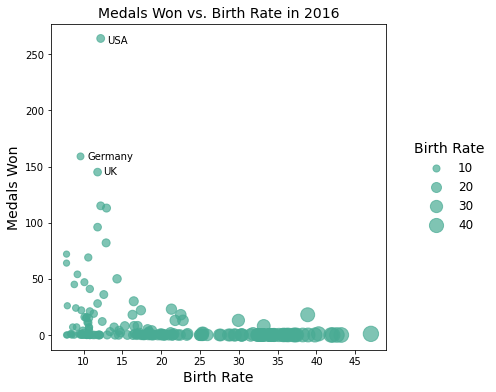

In [62]:
sizes = medal_birth_2016.birth_rate * 5
sizes = sizes.to_list()
sizes = [0.0 if pd.isna(x) else x for x in sizes]

fig, ax = plt.subplots(1, 1, figsize = (6, 6))
sc = ax.scatter(medal_birth_2016.birth_rate, 
                medal_birth_2016.medal_count,
                color = "#49AB94", 
                alpha = 0.7,
                s = sizes)
ax.set_title("Medals Won vs. Birth Rate in 2016", fontsize = 14)
ax.set_ylabel("Medals Won", fontsize = 14)
ax.set_xlabel("Birth Rate", fontsize = 14)
ax.text(13, 260, "USA")
ax.text(10.5, 156, "Germany")
ax.text(12.5, 143, "UK")

kw = dict(prop = "sizes", num = 5, color = "#49AB94", fmt = "{x:,.0f}",
          func = lambda s: s/5)
legend = ax.legend(*sc.legend_elements(**kw), 
                   bbox_to_anchor = (1.05, 0.5), loc = "center left", 
                   fontsize = 12, frameon = False)
legend.set_title("Birth Rate", prop = {"size":14})

pass

### Time Series for Select Countries

In [63]:
birth_rate_sub = birth_rate[["Germany", "Russia", "USA", "Japan"]]
birth_rate_sub.reset_index(inplace = True)
birth_rate_sub.columns = ["year", "Germany_birth", "Russia_birth", "USA_birth", "Japan_birth"]
birth_rate_sub = birth_rate_sub.astype({"year":int})

medal_birth = pd.DataFrame(pd.merge(medal, birth_rate_sub, on = "year", how = "outer"))

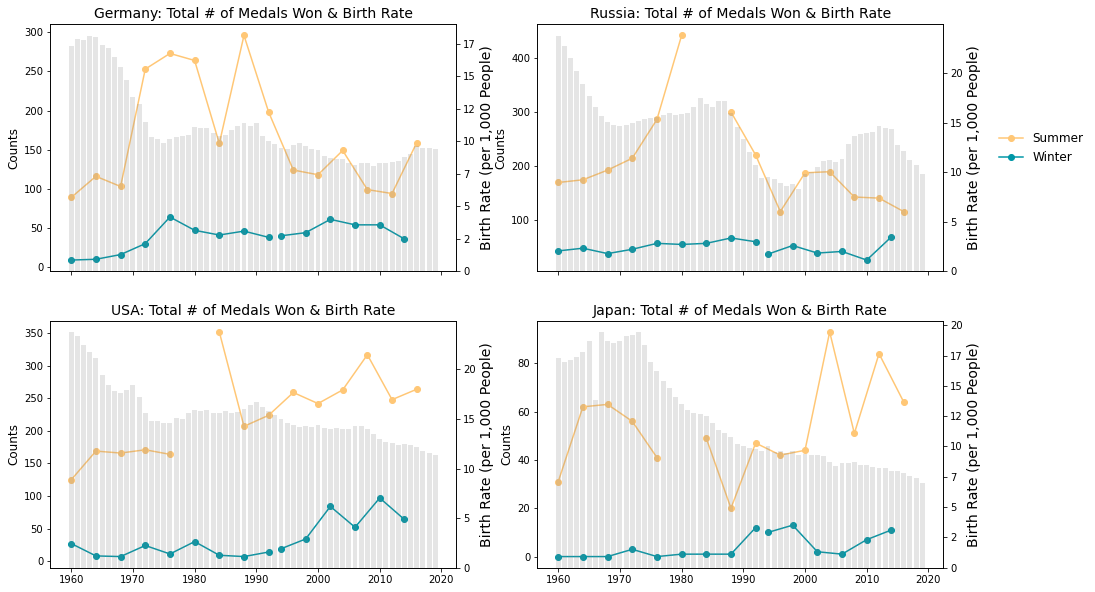

In [64]:
fig, ax1 = plt.subplots(2, 2, sharex = True, figsize = (16, 10))
fig.subplots_adjust(hspace = 0.2)

ax1[0,0].plot(medal_birth.year.iloc[14:], medal_birth.Germany_summer.iloc[14:], color = "#FFC776", marker = "o")
ax1[0,0].plot(medal_birth.year.iloc[14:], medal_birth.Germany_winter.iloc[14:], color = "#0097A7", marker = "o")
ax1[0,0].set_title("Germany: Total # of Medals Won & Birth Rate", fontsize = 14)
ax1[0,0].set_ylabel("Counts", fontsize = 12)
ax2 = ax1[0,0].twinx()
ax2.bar(medal_birth.year, medal_birth.Germany_birth, width = 0.8, alpha = 0.2, color = "gray")
ax2.set_ylabel("Birth Rate (per 1,000 People)", fontsize = 14)
ax2.ticklabel_format(useOffset = False, style = "plain", axis = "y")
ax2.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p : format(int(x), ",")))
#ax1[0].text(1960, 230, "1972, Munich")

ax1[0,1].plot(medal_birth.year.iloc[14:], 
              medal_birth.Russia_summer.iloc[14:], 
              color = "#FFC776", marker = "o", 
              label = "Summer")
ax1[0,1].plot(medal_birth.year.iloc[14:], 
              medal_birth.Russia_winter.iloc[14:], 
              color = "#0097A7", marker = "o", 
              label = "Winter")
ax1[0,1].set_title("Russia: Total # of Medals Won & Birth Rate", fontsize = 14)
ax1[0,1].set_ylabel("Counts", fontsize = 12)
ax1[0,1].legend(bbox_to_anchor = (1.11, 0.5), loc = "center left", fontsize = 12, frameon = False)
ax3 = ax1[0,1].twinx()
ax3.bar(medal_birth.year, medal_birth.Russia_birth, width = 0.8, alpha = 0.2, color = "gray")
ax3.set_ylabel("Birth Rate (per 1,000 People)", fontsize = 14)
ax3.ticklabel_format(useOffset = False, style = "plain", axis = "y")
ax3.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p : format(int(x), ",")))
#ax1[1].text(1982, 440, "1980, Moscow")
#ax1[1].text(2004, 80, "2014, Sochi")

ax1[1,0].plot(medal_birth.year.iloc[14:], medal_birth.USA_summer.iloc[14:], color = "#FFC776", marker = "o")
ax1[1,0].plot(medal_birth.year.iloc[14:], medal_birth.USA_winter.iloc[14:], color = "#0097A7", marker = "o")
ax1[1,0].set_title("USA: Total # of Medals Won & Birth Rate", fontsize = 14)
ax1[1,0].set_ylabel("Counts", fontsize = 12)
ax4 = ax1[1,0].twinx()
ax4.bar(medal_birth.year, medal_birth.USA_birth, width = 0.8, alpha = 0.2, color = "gray")
ax4.set_ylabel("Birth Rate (per 1,000 People)", fontsize = 14)
ax4.ticklabel_format(useOffset = False, style = "plain", axis = "y")
ax4.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p : format(int(x), ",")))
#ax1[2].text(1980, 370, "1984, Los Angeles")

ax1[1,1].plot(medal_birth.year.iloc[14:], medal_birth.Japan_summer.iloc[14:], color = "#FFC776", marker = "o")
ax1[1,1].plot(medal_birth.year.iloc[14:], medal_birth.Japan_winter.iloc[14:], color = "#0097A7", marker = "o")
ax1[1,1].set_title("Japan: Total # of Medals Won & Birth Rate", fontsize = 14)
ax1[1,1].set_ylabel("Counts", fontsize = 12)
ax4 = ax1[1,1].twinx()
ax4.bar(medal_birth.year, medal_birth.Japan_birth, width = 0.8, alpha = 0.2, color = "gray")
ax4.set_ylabel("Birth Rate (per 1,000 People)", fontsize = 14)
ax4.ticklabel_format(useOffset = False, style = "plain", axis = "y")
ax4.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p : format(int(x), ",")))
pass

## GDP

### Data

In [65]:
gdp_cap_growth_all = pd.read_csv("GDP per Capita Growth.csv", skiprows = 4)
gdp_cap_growth_all = gdp_cap_growth_all.drop(["Country Code", "Indicator Name", "Indicator Code", "Unnamed: 65"], 
                                             axis = 1)
gdp_cap_growth_all.rename(columns = {"Country Name":"country"}, inplace = True)
gdp_cap_growth_all.country.replace({"United Kingdom":"UK",
                                    "United States":"USA",
                                    "Russian Federation":"Russia",
                                    "Korea, Rep.":"South Korea"}, inplace = True)

In [66]:
gdp_cap_growth = gdp_cap_growth_all[gdp_cap_growth_all["country"].isin(country_list)]
gdp_cap_growth = gdp_cap_growth.set_index("country").T
gdp_cap_growth = gdp_cap_growth.reindex(sorted(gdp_cap_growth.columns), axis = 1)
gdp_cap_growth.head()

country,Australia,Canada,China,Czech Republic,Denmark,Finland,France,Germany,Hungary,Italy,Japan,Netherlands,Norway,Romania,Russia,South Korea,Sweden,Switzerland,UK,USA
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,0.47,1.12,-26.53,NaN,5.64,6.85,3.60,NaN,NaN,7.49,11.04,-1.01,5.43,NaN,NaN,3.81,5.18,NaN,1.90,0.62
1962,-1.15,5.45,-6.35,NaN,4.85,2.28,5.36,NaN,NaN,5.49,7.90,5.33,1.99,NaN,NaN,0.97,3.69,NaN,0.25,4.48
1963,4.20,3.41,7.62,NaN,-0.15,2.56,4.75,NaN,NaN,4.84,7.38,2.24,3.00,NaN,NaN,6.03,4.74,NaN,4.09,2.91
1964,4.90,4.65,15.47,NaN,8.40,4.65,5.25,NaN,NaN,1.96,10.52,6.84,4.22,NaN,NaN,6.65,6.03,NaN,4.85,4.34


### Scatter Plot for All Countries in 2016

In [67]:
gdp_2016 = gdp_cap_growth_all[["country", "2016"]]
medal_gdp_2016 = pd.merge(total_medal_2016, gdp_2016, on = "country", how = "left")
medal_gdp_2016.columns = ["season", "year", "country", "medal_count", "gdppc_growth"]
medal_gdp_2016.sort_values(by = "medal_count", ascending = False)

,season,year,country,medal_count,gdppc_growth
192,Summer,2016,USA,264,0.98
66,Summer,2016,Germany,159,1.41
191,Summer,2016,UK,145,0.95
150,Summer,2016,Russia,115,0.01
39,Summer,2016,China,113,6.27
...,...,...,...,...,...
98,Summer,2016,Lebanon,0,-1.22
99,Summer,2016,Lesotho,0,2.79
100,Summer,2016,Liberia,0,-4.06
101,Summer,2016,Libya,0,-3.90


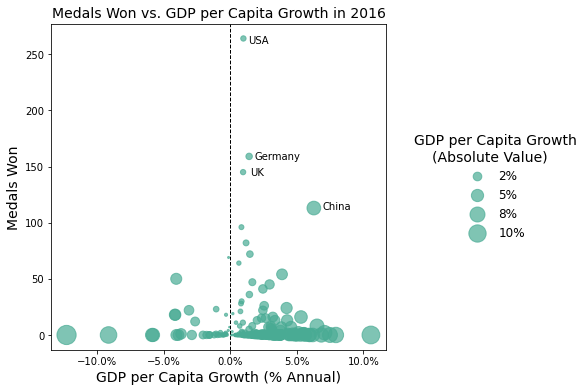

In [68]:
sizes = abs(medal_gdp_2016.gdppc_growth) * 30
sizes = sizes.to_list()
sizes = [0.0 if pd.isna(x) else x for x in sizes]

fig, ax = plt.subplots(1, 1, figsize = (6, 6))
sc = ax.scatter(medal_gdp_2016.gdppc_growth, 
                medal_gdp_2016.medal_count,
                color = "#49AB94", 
                alpha = 0.7,
                s = sizes)
ax.set_title("Medals Won vs. GDP per Capita Growth in 2016", fontsize = 14)
ax.set_ylabel("Medals Won", fontsize = 14)
ax.set_xlabel("GDP per Capita Growth (% Annual)", fontsize = 14)
ax.axvline(x = 0, color = "#000000", linestyle = "--", linewidth = 1)
ax.get_xaxis().set_major_formatter(mtick.PercentFormatter())
ax.text(1.3, 260, "USA")
ax.text(1.8, 156, "Germany")
ax.text(1.5, 142, "UK")
ax.text(6.9, 112, "China")

kw = dict(prop = "sizes", num = 5, color = "#49AB94", fmt = "{x:,.0f}%",
          func = lambda s: s/30)
legend = ax.legend(*sc.legend_elements(**kw), 
                   bbox_to_anchor = (1.05, 0.5), loc = "center left", 
                   fontsize = 12, frameon = False)
legend.set_title("GDP per Capita Growth\n    (Absolute Value)", prop = {"size":14})

pass

### Time Series for Select Countries

In [69]:
gdp_cap_growth_sub = gdp_cap_growth[["Germany", "Russia", "USA", "Japan"]]
gdp_cap_growth_sub.reset_index(inplace = True)
gdp_cap_growth_sub.columns = ["year", "Germany_gdp", "Russia_gdp", "USA_gdp", "Japan_gdp"]
gdp_cap_growth_sub = gdp_cap_growth_sub.astype({"year":int})

In [70]:
medal_gdp = pd.merge(medal, gdp_cap_growth_sub, on = "year", how = "outer")

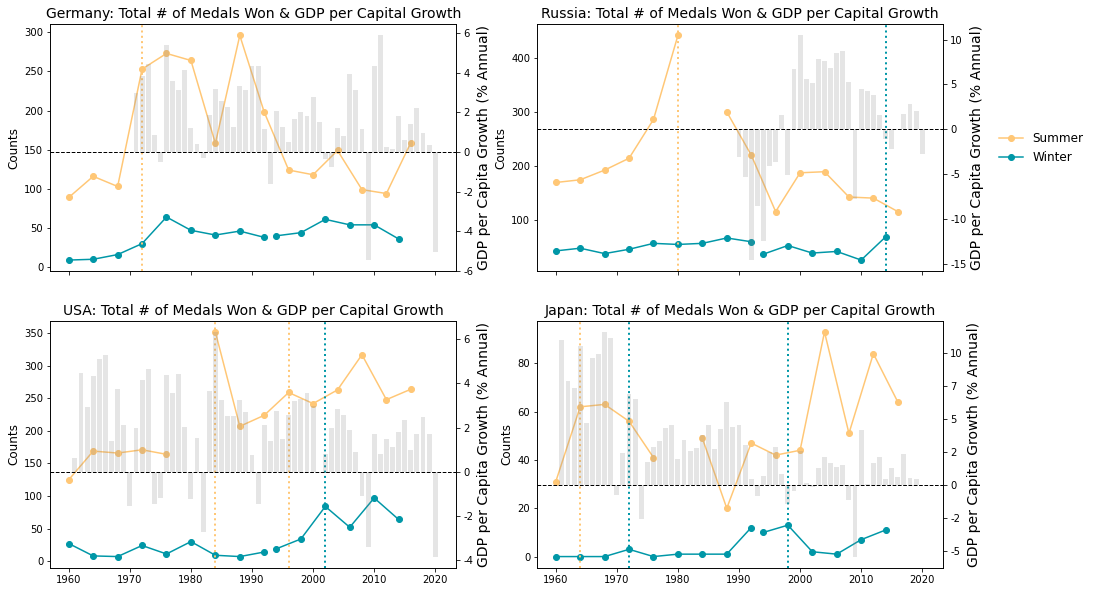

In [71]:
fig, ax1 = plt.subplots(2, 2, sharex = True, figsize = (16, 10))
fig.subplots_adjust(hspace = 0.2)

ax1[0,0].plot(medal_gdp.year.iloc[14:], medal_gdp.Germany_summer.iloc[14:], color = "#FFC776", marker = "o")
ax1[0,0].plot(medal_gdp.year.iloc[14:], medal_gdp.Germany_winter.iloc[14:], color = "#0097A7", marker = "o")
ax1[0,0].set_title("Germany: Total # of Medals Won & GDP per Capital Growth", fontsize = 14)
ax1[0,0].set_ylabel("Counts", fontsize = 12)
ax1[0,0].axvline(x = 1972, color = "#FFC776", linestyle = ":", linewidth = 2)
ax2 = ax1[0,0].twinx()
ax2.bar(medal_gdp.year, medal_gdp.Germany_gdp, width = 0.8, alpha = 0.2, color = "gray")
ax2.set_ylabel("GDP per Capita Growth (% Annual)", fontsize = 14)
ax2.ticklabel_format(useOffset = False, style = "plain", axis = "y")
ax2.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p : format(int(x), ",")))
ax2.axhline(y = 0, color = "#000000", linestyle = "--", linewidth = 1)

ax1[0,1].plot(medal_gdp.year.iloc[14:], medal_gdp.Russia_summer.iloc[14:], 
              color = "#FFC776", marker = "o", label = "Summer")
ax1[0,1].plot(medal_gdp.year.iloc[14:], medal_gdp.Russia_winter.iloc[14:], 
              color = "#0097A7", marker = "o", label = "Winter")
ax1[0,1].set_title("Russia: Total # of Medals Won & GDP per Capital Growth", fontsize = 14)
ax1[0,1].set_ylabel("Counts", fontsize = 12)
ax1[0,1].legend(bbox_to_anchor = (1.11, 0.5), loc = "center left", fontsize = 12, frameon = False)
ax1[0,1].axvline(x = 1980, color = "#FFC776", linestyle = ":", linewidth = 2)
ax1[0,1].axvline(x = 2014, color = "#0097A7", linestyle = ":", linewidth = 2)
ax3 = ax1[0,1].twinx()
ax3.bar(medal_gdp.year, medal_gdp.Russia_gdp, width = 0.8, alpha = 0.2, color = "gray")
ax3.set_ylabel("GDP per Capita Growth (% Annual)", fontsize = 14)
ax3.ticklabel_format(useOffset = False, style = "plain", axis = "y")
ax3.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p : format(int(x), ",")))
ax3.axhline(y = 0, color = "#000000", linestyle = "--", linewidth = 1)

ax1[1,0].plot(medal_gdp.year.iloc[14:], medal_gdp.USA_summer.iloc[14:], color = "#FFC776", marker = "o")
ax1[1,0].plot(medal_gdp.year.iloc[14:], medal_gdp.USA_winter.iloc[14:], color = "#0097A7", marker = "o")
ax1[1,0].set_title("USA: Total # of Medals Won & GDP per Capital Growth", fontsize = 14)
ax1[1,0].set_ylabel("Counts", fontsize = 12)
ax1[1,0].axvline(x = 1984, color = "#FFC776", linestyle = ":", linewidth = 2)
ax1[1,0].axvline(x = 1996, color = "#FFC776", linestyle = ":", linewidth = 2)
ax1[1,0].axvline(x = 2002, color = "#0097A7", linestyle = ":", linewidth = 2)
ax4 = ax1[1,0].twinx()
ax4.bar(medal_gdp.year, medal_gdp.USA_gdp, width = 0.8, alpha = 0.2, color = "gray")
ax4.set_ylabel("GDP per Capita Growth (% Annual)", fontsize = 14)
ax4.ticklabel_format(useOffset = False, style = "plain", axis = "y")
ax4.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p : format(int(x), ",")))
ax4.axhline(y = 0, color = "#000000", linestyle = "--", linewidth = 1)

ax1[1,1].plot(medal_gdp.year.iloc[14:], medal_gdp.Japan_summer.iloc[14:], color = "#FFC776", marker = "o")
ax1[1,1].plot(medal_gdp.year.iloc[14:], medal_gdp.Japan_winter.iloc[14:], color = "#0097A7", marker = "o")
ax1[1,1].set_title("Japan: Total # of Medals Won & GDP per Capital Growth", fontsize = 14)
ax1[1,1].set_ylabel("Counts", fontsize = 12)
ax1[1,1].axvline(x = 1964, color = "#FFC776", linestyle = ":", linewidth = 2)
ax1[1,1].axvline(x = 1972, color = "#0097A7", linestyle = ":", linewidth = 2)
ax1[1,1].axvline(x = 1998, color = "#0097A7", linestyle = ":", linewidth = 2)
ax5 = ax1[1,1].twinx()
ax5.bar(medal_gdp.year, medal_gdp.Japan_gdp, width = 0.8, alpha = 0.2, color = "gray")
ax5.set_ylabel("GDP per Capita Growth (% Annual)", fontsize = 14)
ax5.ticklabel_format(useOffset = False, style = "plain", axis = "y")
ax5.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p : format(int(x), ",")))
ax5.axhline(y = 0, color = "#000000", linestyle = "--", linewidth = 1)

pass

## Economic Freedom

In [72]:
# Load Heritage Freedom Rankings for 2016
SES = pd.read_excel('index2016_data.xlsx')

# Clean up and standardize column names for 2016 Heritage Data
SES.columns = SES.columns.str.replace('\s+', '_').str.lower()

# Change country_name to Team to align with olympics dataset
SES = SES.rename(columns = {'country_name': 'team'})
SES = SES.set_index('team')

# Pull GDPPC, Unemployment Rate, Population, and Freedom Score from Heritage Data
GDP = SES['gdp_per_capita'].to_frame(name = 'GDP Per Capita')
unemp = SES['unemployment'].to_frame(name = 'Unemployment Rate')
pop = SES['population_(millions)'].to_frame(name = 'Population in Millions')
free = SES['2016_score'].to_frame(name = 'Freedom Score')

# Merge the 4 columns above to create new dataframe
a = GDP.merge(unemp, on = 'team')
a = a.merge(pop, on ='team')
final_SES = a.merge(free, on = 'team')
final_SES.head()

<ipython-input-72-4c01903f8bea>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  SES.columns = SES.columns.str.replace('\s+', '_').str.lower()


,GDP Per Capita,Unemployment Rate,Population in Millions,Freedom Score
team,,,,
Afghanistan,"1,936.71",9.10,31.28,NaN
Albania,"11,376.83",16.10,2.77,65.92
Algeria,"14,258.62",9.50,38.70,50.06
Angola,"7,203.35",6.80,24.38,48.94
Argentina,"22,582.50",8.20,41.96,43.77


In [73]:
# Cut Down Olympics Data to 2016
RIO = df[df['year'] == 2016]

# Make DF have same index as the SES DF and standardize columns
RIO = RIO.set_index('team')
RIO.columns = RIO.columns.str.lower()

# Sort out each type of medal
RIO_gold = RIO[RIO['medal'] == 'Gold']
RIO_silver = RIO[RIO['medal'] == 'Silver']
RIO_bronze = RIO[RIO['medal'] == 'Bronze']

# Get count for each type of medal for each country and sort
countryg = RIO_gold.groupby('team').agg('count')
countrys = RIO_silver.groupby('team').agg('count')
countryb = RIO_bronze.groupby('team').agg('count')
country_golds = countryg['medal'].sort_values(ascending=False)
country_silver = countrys['medal'].sort_values(ascending=False)
country_bronze = countryb['medal'].sort_values(ascending=False)

# Merge each count total into one DF
gdf = country_golds.to_frame(name = 'Gold Medals')
sdf = country_silver.to_frame(name = 'Silver Medals')
bdf = country_bronze.to_frame(name = 'Bronze Medals')
a = gdf.merge(sdf, on = 'team', how = 'outer')
a = a.merge(bdf, on = 'team', how ='outer')
table = a.fillna(0)

# Add a column to DF for total medals and merge
total = table['Gold Medals'] + table['Silver Medals'] + table['Bronze Medals']
total_df = total.to_frame(name = 'Total Medals')
final_medals = table.merge(total_df, on ='team')

# Change Great Britain to United Kingdom to align with SES DF
final_medals = final_medals.rename(index = {'Great Britain': 'United Kingdom'})

In [74]:
# Merge 2016 SES data with 2016 Olympics Data
RIO_data = final_medals.merge(final_SES, on = 'team', how = 'outer')
RIO_data = RIO_data.fillna(0)

full_data =  final_medals.merge(final_SES, on = 'team', how = 'outer')
full_data = full_data.fillna(0)

# Remove countries with Freedom Score below 20 - 7 failed states were given a score of 0
RIO_data = RIO_data[RIO_data['Freedom Score'] > 1]

In [75]:
# Find mean freedom score
FS_mean = RIO_data['Freedom Score'].agg('mean')
FS_mean

60.678707865168526

In [76]:
# Find total medals for countries in top 20 for freedom score
top_FS = RIO_data.sort_values(by='Freedom Score', ascending = False)
top_FS['Total Medals'].head(20).agg(sum)

859.0

In [77]:
# Table for top 20 Freedom Scores
tdf = top_FS[['Total Medals', 'Freedom Score']].head(20)
tdf['Total Medals'] = tdf['Total Medals'].astype('int')
tdf

,Total Medals,Freedom Score
team,,
Hong Kong SAR,0,88.55
Singapore,1,87.78
New Zealand,36,81.56
Switzerland,11,81.03
Australia,82,80.34
Canada,69,77.97
Chile,0,77.66
Ireland,3,77.31
Estonia,4,77.22


In [78]:
# Table for bottom 20 Freedom Scores
bot_FS = RIO_data.sort_values(by='Freedom Score', ascending = True)
bdf = bot_FS[['Total Medals', 'Freedom Score']].head(20)
bdf['Total Medals'] = bdf['Total Medals'].astype('int')
bdf

,Total Medals,Freedom Score
team,,
"Korea, North",0,2.30
Cuba,11,29.79
Venezuela,3,33.74
Zimbabwe,0,38.23
Turkmenistan,0,41.89
Eritrea,0,42.70
"Congo, Republic of",0,42.80
Iran,8,43.49
Equatorial Guinea,0,43.67


In [79]:
# Total medals for bottom 20 freedom score countries
bot_FS['Total Medals'].head(20).agg(sum)

72.0

## Gender Equality (Wage Gap)

### Data

In [80]:
wom_summer = pd.DataFrame(index = summer_olympics.year.unique())

In [81]:
wom_summer['tot_athletes'] = summer_olympics.year.value_counts()
wom_summer['female_athletes'] = summer_olympics[summer_olympics.sex == 'F'].year.value_counts()
wom_summer['female_athletes'].fillna(0, inplace = True)
wom_summer['male_athletes'] = summer_olympics[summer_olympics.sex == 'M'].year.value_counts()
wom_summer['pct_female'] = wom_summer.female_athletes / wom_summer.tot_athletes
wom_summer.reset_index(level = 0, inplace = True)
wom_summer.columns = ['year','tot_athletes','female_athletes','male_athletes','pct_female']
wom_summer.sort_values('year', axis = 0, inplace=True, ascending = True)
wom_summer['female_athletes'].fillna(0, inplace = True)

In [82]:
wom_winter = pd.DataFrame(index = winter_olympics.year.unique())

In [83]:
wom_winter['tot_athletes'] = winter_olympics.year.value_counts()
wom_winter['female_athletes'] = winter_olympics[winter_olympics.sex == 'F'].year.value_counts()
wom_winter['female_athletes'].fillna(0, inplace = True)
wom_winter['male_athletes'] = winter_olympics[winter_olympics.sex == 'M'].year.value_counts()
wom_winter['pct_female'] = wom_winter.female_athletes / wom_winter.tot_athletes
wom_winter.reset_index(level = 0, inplace = True)
wom_winter.columns = ['year','tot_athletes','female_athletes','male_athletes','pct_female']
wom_winter.sort_values('year', axis = 0, inplace=True, ascending = True)
wom_winter['female_athletes'].fillna(0, inplace = True)

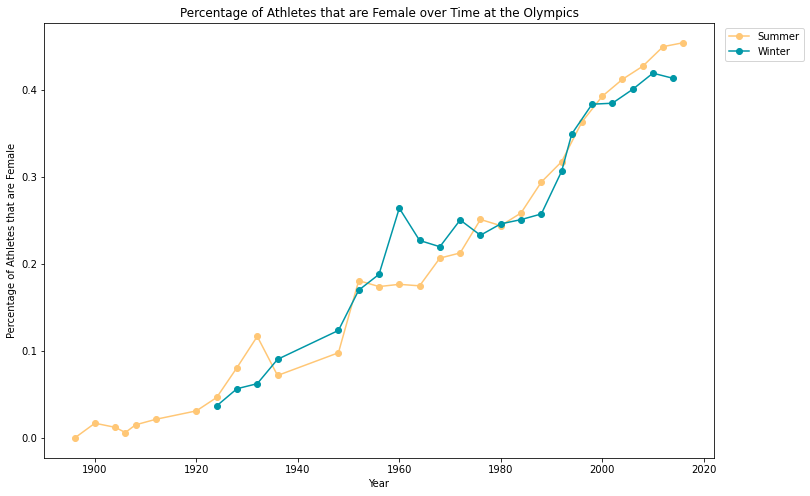

In [84]:
fig, ax = plt.subplots(1, 1, sharex = True, figsize = (12, 8))
fig.subplots_adjust(hspace = 0.2)

ax.plot(wom_summer.year, wom_summer.pct_female, color = "#FFC776", marker = "o", label = "Summer")
ax.plot(wom_winter.year, wom_winter.pct_female, color = "#0097A7", marker = "o", label = "Winter")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Athletes that are Female")
ax.set_title("Percentage of Athletes that are Female over Time at the Olympics")
ax.legend(bbox_to_anchor=(1.01, 1), loc = "upper left")

In [85]:
fem_gold = pd.DataFrame(index = summer_olympics.year.unique())
fem_gold['tot_fem_gold'] = summer_olympics[summer_olympics.sex == 'F'][summer_olympics.medal == 'Gold']\
.year.value_counts()
fem_gold['USA_fem_gold'] = summer_olympics[summer_olympics.noc == 'USA'][summer_olympics.sex == 'F']\
[summer_olympics.medal == 'Gold'].year.value_counts()
fem_gold['UK_fem_gold'] = summer_olympics[summer_olympics.noc == 'GBR'][summer_olympics.sex == 'F']\
[summer_olympics.medal == 'Gold'].year.value_counts()
fem_gold['KOR_fem_gold'] = summer_olympics[summer_olympics.noc == 'KOR'][summer_olympics.sex == 'F']\
[summer_olympics.medal == 'Gold'].year.value_counts()
fem_gold['JPN_fem_gold'] = summer_olympics[summer_olympics.noc == 'JPN'][summer_olympics.sex == 'F']\
[summer_olympics.medal == 'Gold'].year.value_counts()
fem_gold['AUS_fem_gold'] = summer_olympics[summer_olympics.noc == 'AUS'][summer_olympics.sex == 'F']\
[summer_olympics.medal == 'Gold'].year.value_counts()
fem_gold['CHN_fem_gold'] = summer_olympics[summer_olympics.noc == 'CHN'][summer_olympics.sex == 'F']\
[summer_olympics.medal == 'Gold'].year.value_counts()
fem_gold['CHN_fem_gold'] = summer_olympics[summer_olympics.noc == 'CHN'][summer_olympics.sex == 'F']\
[summer_olympics.medal == 'Gold'].year.value_counts()
fem_gold['Germany_fem_gold'] = summer_olympics[summer_olympics.team == 'Germany'][summer_olympics.sex == 'F']\
[summer_olympics.medal == 'Gold'].year.value_counts()
fem_gold['France_fem_gold'] = summer_olympics[summer_olympics.team == 'France'][summer_olympics.sex == 'F']\
[summer_olympics.medal == 'Gold'].year.value_counts()

fem_gold.reset_index(level = 0, inplace = True)
fem_gold.columns = ['year','tot_fem_gold',
                    'USA_fem_gold',
                    'UK_fem_gold',
                    'KOR_fem_gold',
                    'JPN_fem_gold',
                    'AUS_fem_gold',
                    'CHN_fem_gold',
                   'Germany_fem_gold','France_fem_gold']
fem_gold.fillna(0, inplace = True)
fem_gold['pct_USA_fem_gold'] = fem_gold.USA_fem_gold/fem_gold.tot_fem_gold
fem_gold['pct_UK_fem_gold'] = fem_gold.UK_fem_gold/fem_gold.tot_fem_gold
fem_gold['pct_KOR_fem_gold'] = fem_gold.KOR_fem_gold/fem_gold.tot_fem_gold
fem_gold['pct_JPN_fem_gold'] = fem_gold.JPN_fem_gold/fem_gold.tot_fem_gold
fem_gold['pct_AUS_fem_gold'] = fem_gold.AUS_fem_gold/fem_gold.tot_fem_gold
fem_gold['pct_CHN_fem_gold'] = fem_gold.CHN_fem_gold/fem_gold.tot_fem_gold
fem_gold['pct_Germany_fem_gold'] = fem_gold.Germany_fem_gold/fem_gold.tot_fem_gold
fem_gold['pct_France_fem_gold'] = fem_gold.France_fem_gold/fem_gold.tot_fem_gold
fem_gold.sort_values('year', axis = 0, inplace=True, ascending = True)

<ipython-input-85-6208e1f8279e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fem_gold['tot_fem_gold'] = summer_olympics[summer_olympics.sex == 'F'][summer_olympics.medal == 'Gold']\
<ipython-input-85-6208e1f8279e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fem_gold['USA_fem_gold'] = summer_olympics[summer_olympics.noc == 'USA'][summer_olympics.sex == 'F']\
<ipython-input-85-6208e1f8279e>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fem_gold['UK_fem_gold'] = summer_olympics[summer_olympics.noc == 'GBR'][summer_olympics.sex == 'F']\
<ipython-input-85-6208e1f8279e>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fem_gold['KOR_fem_gold'] = summer_olympics[summer_olympics.noc == 'KOR'][summer_olympics.sex == 'F']\
<ipython-input-85-6208e1f8279e>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fem_gold['JPN_fem_gold']

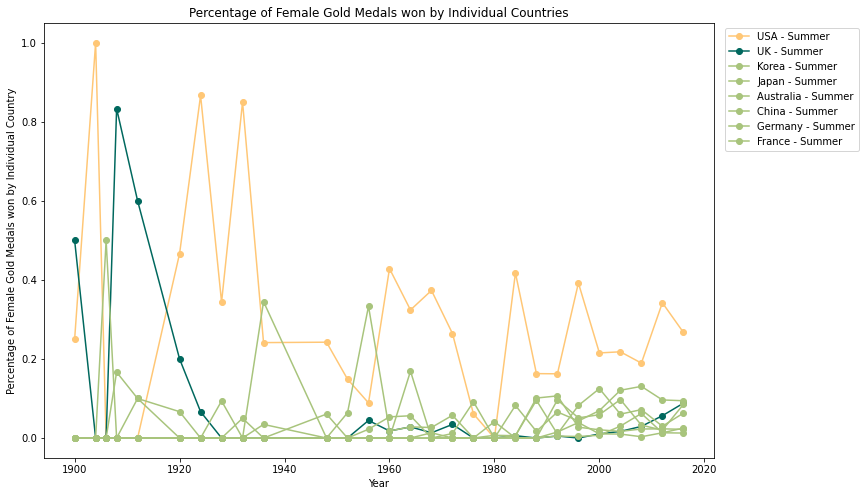

In [86]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))
fig.subplots_adjust(hspace = 0.2)

ax.plot(fem_gold.year, fem_gold.pct_USA_fem_gold, color = "#FFC776", marker = "o", label = "USA - Summer")
ax.plot(fem_gold.year, fem_gold.pct_UK_fem_gold, color = "#00685E", marker = "o", label = "UK - Summer")
ax.plot(fem_gold.year, fem_gold.pct_KOR_fem_gold, color = "#A8C47C", marker = "o", label = "Korea - Summer")
ax.plot(fem_gold.year, fem_gold.pct_JPN_fem_gold, color = "#A8C47C", marker = "o", label = "Japan - Summer")
ax.plot(fem_gold.year, fem_gold.pct_AUS_fem_gold, color = "#A8C47C", marker = "o", label = "Australia - Summer")
ax.plot(fem_gold.year, fem_gold.pct_CHN_fem_gold, color = "#A8C47C", marker = "o", label = "China - Summer")
ax.plot(fem_gold.year, fem_gold.pct_Germany_fem_gold, color = "#A8C47C", marker = "o", label = "Germany - Summer")
ax.plot(fem_gold.year, fem_gold.pct_France_fem_gold, color = "#A8C47C", marker = "o", label = "France - Summer")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Female Gold Medals won by Individual Country")
ax.set_title("Percentage of Female Gold Medals won by Individual Countries")
ax.legend(bbox_to_anchor=(1.01, 1), loc = "upper left")

### Wage Gap Dataset

In [87]:
wage_gap = pd.read_csv("full_gender_data.csv")
cols = ['country', 'indicator', 'subject','measure','frequency','year','value','flag_codes']
wage_gap.columns = cols
wage_gap.drop(columns = 'measure', axis = 0, inplace = True)
wage_gap.drop(columns = 'indicator', axis = 0, inplace = True)
wage_gap.drop(columns = 'frequency', axis = 0, inplace = True)
wage_gap = wage_gap[wage_gap.subject == 'EMPLOYEE']

In [88]:
wage_gap.head()

,country,subject,year,value,flag_codes
0,AUS,EMPLOYEE,1975,21.58,NaN
1,AUS,EMPLOYEE,1976,20.75,NaN
2,AUS,EMPLOYEE,1977,18.39,NaN
3,AUS,EMPLOYEE,1978,19.79,NaN
4,AUS,EMPLOYEE,1979,20.00,NaN


In [89]:
wage_gap.shape

(756, 5)

In [90]:
wage_gap_p = wage_gap.pivot(index='year', columns='country', values='value')

Text(0.5, 1.0, 'Median Gender Wage Gap for Countries over Time')

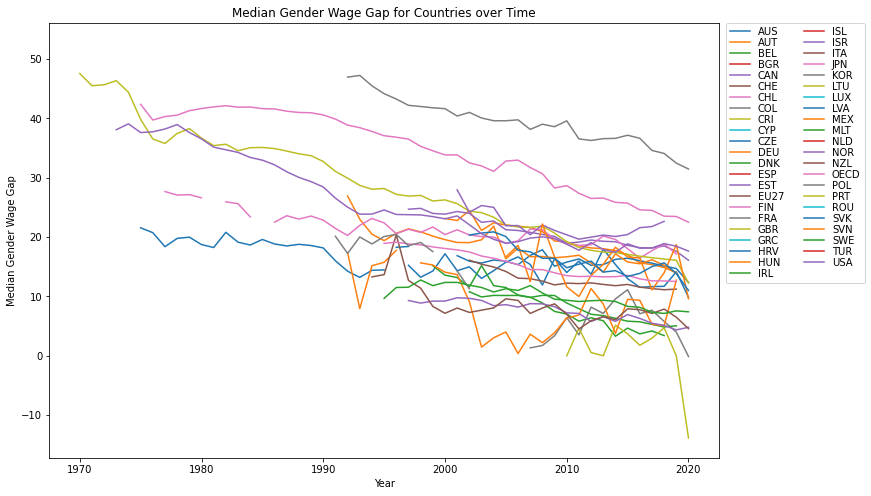

In [91]:
fig, ax = plt.subplots(1,1, figsize = (12, 8))
#ax.plot(wage_gap_p)
for var in wage_gap_p.columns:
    ax.plot(wage_gap_p[var], label = var)
ax.legend(ncol = 2, labelspacing = .1, 
          borderaxespad = 0, 
          bbox_to_anchor=(1.01, 1), loc = "upper left")
ax.set_xlabel("Year")
ax.set_ylabel("Median Gender Wage Gap")
ax.set_title("Median Gender Wage Gap for Countries over Time")

Text(0.5, 1.0, 'Median Gender Wage Gap for Countries over Time')

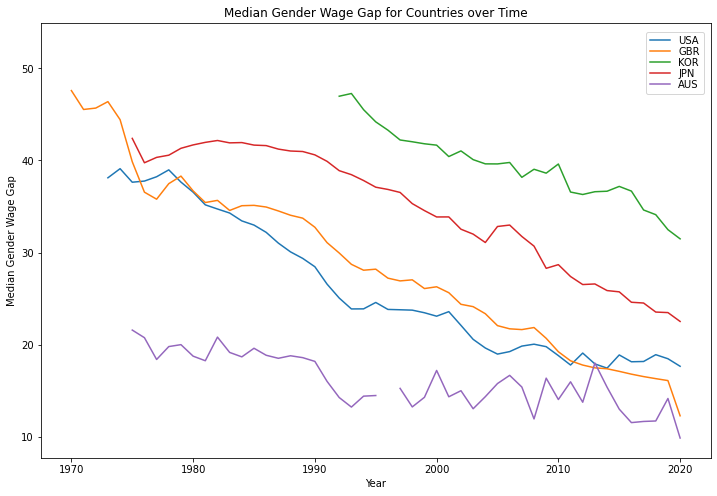

In [92]:
# Repeat above plot, for specific countries 
fig, ax = plt.subplots(1,1, figsize = (12, 8))
#ax.plot(wage_gap_p)
for var in wage_gap_p[['USA','GBR','KOR','JPN','AUS']].columns:
    ax.plot(wage_gap_p[var], label = var)
ax.legend(labelspacing = .1, borderaxespad = 0, bbox_to_anchor=(0.99, 0.98), loc = "upper right")
ax.set_xlabel("Year")
ax.set_ylabel("Median Gender Wage Gap")
ax.set_title("Median Gender Wage Gap for Countries over Time")

# 4. Individual Event Domination

In [93]:
# Create function that provides gold medal counts by sport
def by_sport(sport):
    """
    Input the sport - function returns a ranking for each country 
    by gold medals won in sport
    """
    sort_sport = df.groupby('sport')
    selected_sport = sort_sport.get_group(sport)
    goldM = selected_sport[selected_sport['medal'] == 'Gold']
    country = goldM.groupby('team').agg('count')
    return country['id'].sort_values(ascending = False)


# Create function that provides gold medal counts by sport and event
def by_event(sport, event):
    """
    Input the sport and event - function returns a ranking 
    for each country by gold medals won in event
    """
    sort_sport = df.groupby('sport')
    selected_sport = sort_sport.get_group(sport)
    selected_event = selected_sport[selected_sport['event'] == event]
    goldM = selected_event[selected_event['medal'] == 'Gold']
    country = goldM.groupby('team').agg('count')
    return country['id'].sort_values(ascending = False)

# Create function that provides gold medal counts by sport and event in 21st century
def by_event_2000(sport, event):
    """
    Input the sport and event - function returns a ranking for each country 
    by gold medals won in event in 21st century
    """
    new = df[df['year'] >= 2000]
    sort_sport = new.groupby('sport')
    selected_sport = sort_sport.get_group(sport)
    selected_event = selected_sport[selected_sport['event'] == event]
    goldM = selected_event[selected_event['medal'] == 'Gold']
    country = goldM.groupby('team').agg('count')
    return country['id'].sort_values(ascending = False)

# Create function that provides gold medal counts by sport and event in 20th century
def by_event_1996(sport, event):
    """
    Input the sport and event - function returns a ranking for each country 
    by gold medals won in event in 20th century
    """
    new = df[df['year'] < 2000]
    sort_sport = new.groupby('sport')
    selected_sport = sort_sport.get_group(sport)
    selected_event = selected_sport[selected_sport['event'] == event]
    goldM = selected_event[selected_event['medal'] == 'Gold']
    country = goldM.groupby('team').agg('count')
    return country['id'].sort_values(ascending = False)

### Table Tennis & Swimming Domination

In [94]:
# Look at table tennis perfromance
tt = by_sport('Table Tennis')

# Combine the 3 China indices and create DF
tt = tt.rename(index = {'China-1': 'China', 'China-2': 'China'}).to_frame("Gold Medals")
tt = tt.drop('China')
new = pd.Series({'Gold Medals': 49}, name = 'China')
tt = tt.append(new, ignore_index = False)
table_tennis = tt.sort_values(by = 'Gold Medals', ascending = False)
table_tennis

,Gold Medals
team,
China,49
South Korea,4
Sweden,1


In [95]:
# Look at swimming perfromance
swimming = by_sport('Swimming').to_frame(name='Total Golds')
swim = swimming.head(8)
swim

,Total Golds
team,
United States,645
Australia,118
East Germany,62
Hungary,36
Netherlands,30
Japan,28
Great Britain,23
Soviet Union,18


Text(0.5, 1.0, 'Table Tennis Gold Medals (1896 - 2016)')

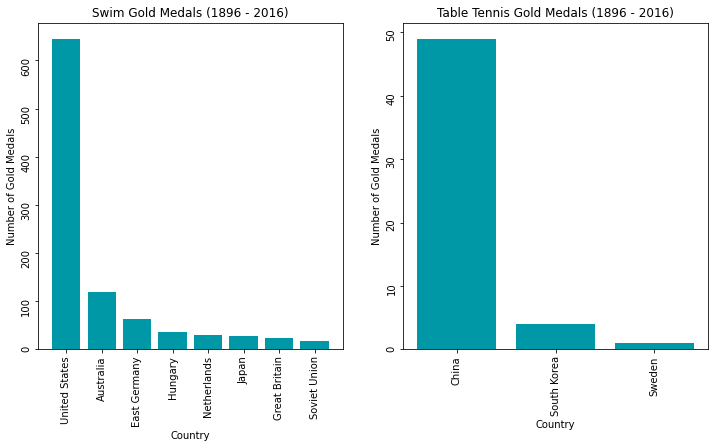

In [96]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
fig.subplots_adjust(hspace = 0.2)

swim.reset_index(level = 0, inplace = True)
swim.columns = ['Team','Golds']
ax[0].bar(x = swim.Team, height = swim.Golds, color = '#0097A7')
ax[0].tick_params(labelrotation = 90)
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Number of Gold Medals')
ax[0].set_title('Swim Gold Medals (1896 - 2016)')

table_tennis.reset_index(level = 0, inplace = True)
table_tennis.columns = ['Team','Golds']
ax[1].bar(x = table_tennis.Team, height = table_tennis.Golds, color = '#0097A7')
ax[1].tick_params(labelrotation = 90)
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Number of Gold Medals')
ax[1].set_title('Table Tennis Gold Medals (1896 - 2016)')

### Track & Field Domination

In [97]:
# Pull out men and women's 100m & 200m gold medal winners by country
m_100 = by_event('Athletics', 'Athletics Men\'s 100 metres').to_frame(name = "m_100")
m_200 = by_event('Athletics', 'Athletics Men\'s 200 metres').to_frame(name = "m_200")
w_100 = by_event('Athletics', 'Athletics Women\'s 100 metres').to_frame(name = "w_100")
w_200 = by_event('Athletics', 'Athletics Women\'s 200 metres').to_frame(name = "w_200")

# Merge the above dataframe into one large DF
a = m_100.merge(m_200, on = 'team', how='outer')
a = a.merge(w_100, on = 'team', how='outer')
a = a.merge(w_200, on = 'team', how='outer')
final = a.fillna(0)

# Calculate total number of sprint medals and add to main DF
sprints = final['m_100'] + final['m_200'] + final['w_200']+final['w_100']
final = final.merge(sprints.to_frame(name = 'Total Golds'), on ='team')
final

,m_100,m_200,w_100,w_200,Total Golds
team,,,,,
United States,17.00,17.00,9.00,6.00,49.00
Great Britain,3.00,0.00,0.00,0.00,3.00
Jamaica,3.00,4.00,3.00,3.00,13.00
Canada,2.00,2.00,0.00,0.00,4.00
Germany,1.00,0.00,0.00,0.00,1.00
South Africa,1.00,0.00,0.00,0.00,1.00
Soviet Union,1.00,1.00,1.00,0.00,3.00
Trinidad and Tobago,1.00,0.00,0.00,0.00,1.00
Italy,0.00,2.00,0.00,0.00,2.00


In [98]:
# Pull out men and women's 100m & 200m gold medal winners by country since 2000
men_100 = by_event_2000('Athletics', 'Athletics Men\'s 100 metres').to_frame(name = "men_100")
men_200 = by_event_2000('Athletics', 'Athletics Men\'s 200 metres').to_frame(name = "men_200")
wo_100 = by_event_2000('Athletics', 'Athletics Women\'s 100 metres').to_frame(name = "women_100")
wo_200 = by_event_2000('Athletics', 'Athletics Women\'s 200 metres').to_frame(name = "women_200")

# Merge above dfs into one larger DF
ab = men_100.merge(men_200, on = 'team', how='outer')
ab = ab.merge(wo_100, on = 'team', how='outer')
ab = ab.merge(wo_200, on = 'team', how='outer')
finals = ab.fillna(0)

# Calculate total golds for sprint events since 2000
sprintsz = finals['men_100'] + finals['men_200'] + finals['women_200']+finals['women_100']
final_2000 = finals.merge(sprintsz.to_frame(name = 'Total Golds'), on ='team')
final_2000

,men_100,men_200,women_100,women_200,Total Golds
team,,,,,
Jamaica,3.00,3.00,3.00,3.00,12.00
United States,2.00,1.00,0.00,1.00,4.00
Greece,0.00,1.00,0.00,0.00,1.00
Belarus,0.00,0.00,1.00,0.00,1.00
Bahamas,0.00,0.00,0.00,1.00,1.00


Text(0.5, 1.0, '100m & 200m Gold Medals (2000-2016)')

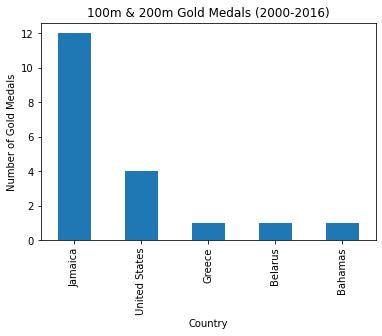

In [99]:
# Plot for 100m and 200m events
sprintsz.plot.bar(rot = 0)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals')
plt.title('100m & 200m Gold Medals (2000-2016)')

In [100]:
# Pull out men and women's 800m & 1600m gold medal winners by country since 2000
men_800 = by_event_2000('Athletics', 'Athletics Men\'s 800 metres').to_frame(name = "men_800")
men_1500 = by_event_2000('Athletics', 'Athletics Men\'s 1,500 metres').to_frame(name = "men_1500")
wo_800 = by_event_2000('Athletics', 'Athletics Women\'s 800 metres').to_frame(name = "women_800")
wo_1500 = by_event_2000('Athletics', 'Athletics Women\'s 1,500 metres').to_frame(name = "women_1500")

# Merge above dfs into one larger DF
abc = men_800.merge(men_1500, on = 'team', how='outer')
abc = abc.merge(wo_800, on = 'team', how='outer')
abc = abc.merge(wo_1500, on = 'team', how='outer')
mid = abc.fillna(0)

# Calculate total golds for mid distance events since 2000
mid_dis = mid['men_800'] + mid['men_1500'] + mid['women_800']+mid['women_1500']
mid_2000 = mid.merge(mid_dis.to_frame(name = 'Total Golds'), on ='team')
midz = mid_2000.head(5).sort_values(by='Total Golds', ascending = False)
midz

,men_800,men_1500,women_800,women_1500,Total Golds
team,,,,,
Kenya,3.00,2.00,1.00,2.00,8.00
Russia,1.00,0.00,1.00,0.00,2.00
Algeria,0.00,1.00,0.00,1.00,2.00
Germany,1.00,0.00,0.00,0.00,1.00
Morocco,0.00,1.00,0.00,0.00,1.00


Text(0.5, 1.0, '800m & 1500m Gold Medals (2000-2016)')

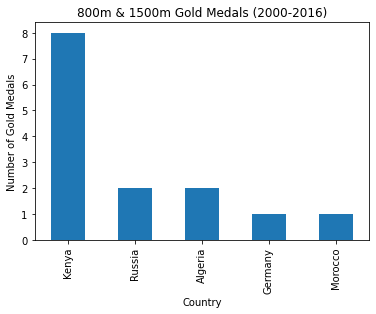

In [101]:
# Plot for 800 and 1500m
midz['Total Golds'].plot.bar(rot = 0)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals')
plt.title('800m & 1500m Gold Medals (2000-2016)')

In [102]:
# Pull out men and women's 5k & 10k gold medal winners by country since 2000
men_5 = by_event_2000('Athletics', 'Athletics Men\'s 5,000 metres').to_frame(name = "men_5K")
men_10 = by_event_2000('Athletics', 'Athletics Men\'s 10,000 metres').to_frame(name = "men_10K")
wo_5 = by_event_2000('Athletics', 'Athletics Women\'s 5,000 metres').to_frame(name = "women_5K")
wo_10 = by_event_2000('Athletics', 'Athletics Women\'s 10,000 metres').to_frame(name = "women_10K")

# Merge above dfs into one larger DF
abcd = men_5.merge(men_10, on = 'team', how='outer')
abcd = abcd.merge(wo_5, on = 'team', how='outer')
abcd = abcd.merge(wo_10, on = 'team', how='outer')
long = abcd.fillna(0)

# Calculate total golds for long distnace events since 2000
long_dis = long['men_5K'] + long['men_10K'] + long['women_5K']+long['women_10K']
long_2000 = long.merge(long_dis.to_frame(name = 'Total Golds'), on ='team')
longs = long_2000.sort_values(by='Total Golds', ascending = False)
longs

,men_5K,men_10K,women_5K,women_10K,Total Golds
team,,,,,
Ethiopia,2.00,3.00,3.00,4.00,12.00
Great Britain,2.00,2.00,0.00,0.00,4.00
Morocco,1.00,0.00,0.00,0.00,1.00
Kenya,0.00,0.00,1.00,0.00,1.00
Romania,0.00,0.00,1.00,0.00,1.00
China,0.00,0.00,0.00,1.00,1.00


Text(0.5, 1.0, '5K & 10K Gold Medals (2000-2016)')

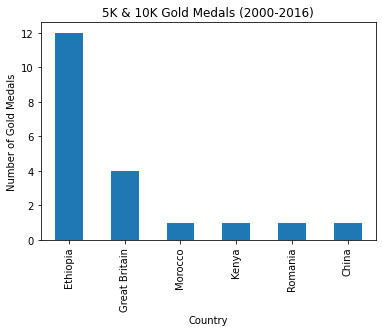

In [103]:
longs['Total Golds'].plot.bar(rot = 0)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals')
plt.title('5K & 10K Gold Medals (2000-2016)')

In [104]:
# Look at all Jamaican gold medals by sport
jam = df[df['team'] == 'Jamaica']
jam_gold = jam[jam['medal'] == 'Gold']
JAM = jam_gold.groupby('sport').agg('count')
JA = JAM['medal'].to_frame(name = 'Jamaican Gold Medals')

# Look at all Jamaican gold medals by sport
eth = df[df['team'] == 'Ethiopia']
eth_gold = eth[eth['medal'] == 'Gold']
ETH = eth_gold.groupby('sport').agg('count')
ET = ETH['medal'].to_frame(name = 'Ethiopian Gold Medals')

# Look at all Kenyan gold medals by sport
ken = df[df['team'] == 'Kenya']
ken_gold = ken[ken['medal'] == 'Gold']
KEN = ken_gold.groupby('sport').agg('count')
KE = KEN['medal'].to_frame(name = 'Kenyan Gold Medals')
KE = KE.rename(index = {'Boxing': 'Other Sports'})

KE.insert(1, 'Jamaican Gold Medals', [38, 0], True)
KE.insert(2, 'Ethiopoian Gold Medals', [22, 0], True)
KE

,Kenyan Gold Medals,Jamaican Gold Medals,Ethiopoian Gold Medals
sport,,,
Athletics,33,38,22
Other Sports,1,0,0


In [105]:
# Calculate totals for all events in 20th century
hund = by_event_1996('Athletics', 'Athletics Men\'s 100 metres')
all1 = by_event_1996('Athletics', 'Athletics Men\'s 100 metres').agg('sum')
UH = hund['United States']
two = by_event_1996('Athletics', 'Athletics Men\'s 200 metres')
all2 = by_event_1996('Athletics', 'Athletics Men\'s 200 metres').agg('sum')
UT = two['United States']
eig = by_event_1996('Athletics', 'Athletics Men\'s 800 metres')
all3 = by_event_1996('Athletics', 'Athletics Men\'s 800 metres').agg('sum')
UE = eig['United States']
mil = by_event_1996('Athletics', 'Athletics Men\'s 1,500 metres')
all4 = by_event_1996('Athletics', 'Athletics Men\'s 1,500 metres').agg('sum')
UM = mil['United States']
k5 = by_event_1996('Athletics', 'Athletics Men\'s 5,000 metres')
all5 = by_event_1996('Athletics', 'Athletics Men\'s 5,000 metres').agg('sum')
U5 = k5['United States']
k10 = by_event_1996('Athletics', 'Athletics Men\'s 10,000 metres')
all6 = by_event_1996('Athletics', 'Athletics Men\'s 10,000 metres').agg('sum')
U10 = k10['United States']

# USA golds in specific track events ever in 20th century
USA_totals = UH + UT + UE + UM + U5 + U10
USA_totals

45

In [106]:
# Calculate all golds in 20th century for specific track events
all_golds = all1 + all2 + all3 + all4 + all5 + all6
all_golds

132